## REGRESSION USING XGBoost (XGBRegressor)

Importing basic libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

Importing data file

In [3]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Dropping columns of no use

In [4]:
df.drop('Email', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)
df.drop('Avatar', axis=1, inplace=True)

Defining X and y columns


In [5]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

Plotting each feature of X with y

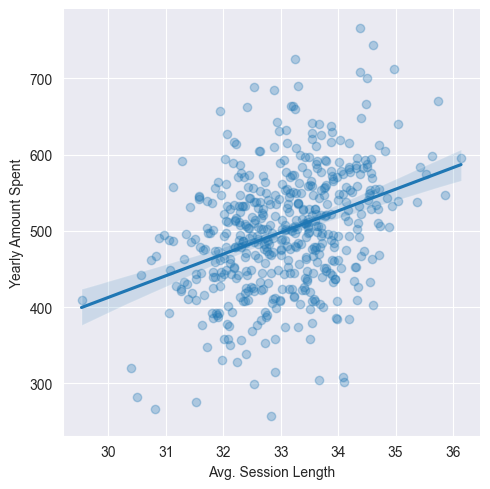

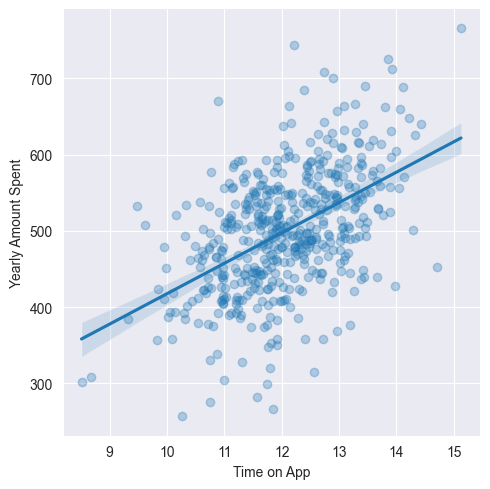

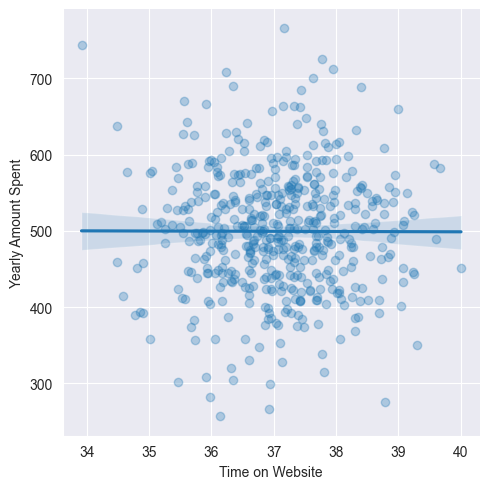

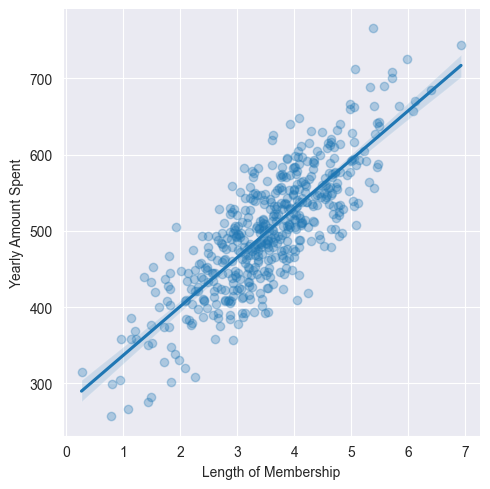

In [6]:
for feature in X.columns:
    sns.lmplot(x = feature, y = 'Yearly Amount Spent', data = df, scatter_kws={'alpha':0.3})

Splitting Training and Test data from dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Regression using XGBRegressor

In [8]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Generating Dataframe of actual vs predicted value

In [9]:
a = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
a

,Actual,Predicted,Difference
90,449.070319,447.773926,1.296394
254,482.602467,482.911011,-0.308543
283,374.269675,371.131866,3.137808
445,513.153112,515.482483,-2.329371
461,502.771075,498.534515,4.236559
...,...,...,...
372,385.152338,391.413422,-6.261084
56,520.898794,524.866394,-3.967600
440,499.140152,499.151855,-0.011703
60,616.851523,601.175110,15.676413


Plotting the dataframe

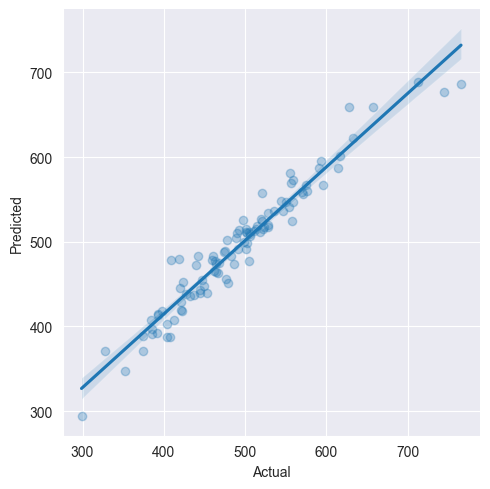

In [10]:
sns.lmplot(x = 'Actual', y = 'Predicted', data = a, scatter_kws={'alpha':0.3})

Evaluating the results

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

MAE: 14.679806771381122
MSE: 443.84957816302284
RMSE: 21.067737851108333
R^2 Score: 0.9340243405216604


Prediction (example)

In [12]:
new = np.array([[32, 10, 36, 3]])
new_predicted = model.predict(new)
new_predicted

array([369.35822], dtype=float32)